# COVID Data Exploration
<ul>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
    <ul>
        <li><a href="#prelim_assess">Premilinary Assessment</a></li>
        <li><a href="#clean1">Cleaning Step 1</a></li>
        <li><a href="#clean2">Cleaning Step 2</a></li>
        <li><a href="#covid_now">Covid in the current day</a></li>
        <li><a href="#assess">Assessment</a></li>
    </ul>
<li><a href="#univ_explor">Univariate Exploration</a></li>
<li><a href="#bivar_explor">Bivariate Exploration</a></li>
<li><a href="#multivar_explor">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='wrangling'></a>
## Preliminary Wrangling

This document explores a dataset containing information about the current Covid pandemic.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime, timedelta
import requests
import os

%matplotlib inline

In [2]:
# Download with each run of the notebook the latest file containing Covid data

url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
file_name = 'owid-covid-data.csv'

# If the file exists in the current directory, delete it
if os.path.exists(file_name): 
    os.remove(file_name)
    
# Dowload the latest dataset
response = requests.get(url)

with open('owid-covid-data.csv', mode = 'wb') as file:
    file.write(response.content)

In [3]:
# Load in the dataset into a pandas dataframe

covid_df = pd.read_csv('owid-covid-data.csv')

A description of the data can be found at https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md

In [4]:
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [5]:
print(covid_df.shape)

(25924, 34)


In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25924 entries, 0 to 25923
Data columns (total 34 columns):
iso_code                           25860 non-null object
continent                          25683 non-null object
location                           25924 non-null object
date                               25924 non-null object
total_cases                        25694 non-null float64
new_cases                          25694 non-null float64
total_deaths                       25694 non-null float64
new_deaths                         25694 non-null float64
total_cases_per_million            25630 non-null float64
new_cases_per_million              25630 non-null float64
total_deaths_per_million           25630 non-null float64
new_deaths_per_million             25630 non-null float64
total_tests                        7330 non-null float64
new_tests                          6663 non-null float64
total_tests_per_thousand           7330 non-null float64
new_tests_per_thousand      

In [7]:
# Create DataFrame containg only the data for Switzerland, the country of interest for my analysis

covid_swiss_df = covid_df[covid_df.location == 'Switzerland']
covid_swiss_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
22743,CHE,Europe,Switzerland,2020-06-20,31209.0,92.0,1677.0,0.0,3606.052,10.630,...,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78
22744,CHE,Europe,Switzerland,2020-06-21,31209.0,0.0,1677.0,0.0,3606.052,0.000,...,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78
22745,CHE,Europe,Switzerland,2020-06-22,31209.0,0.0,1679.0,2.0,3606.052,0.000,...,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78
22746,CHE,Europe,Switzerland,2020-06-23,31227.0,18.0,1679.0,0.0,3608.132,2.080,...,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78
22747,CHE,Europe,Switzerland,2020-06-24,31249.0,22.0,1679.0,0.0,3610.674,2.542,...,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78


In [8]:
# I would also like to check the columns that are hidden by jupyter notebook
columns_to_check = ['total_deaths_per_million', 'new_deaths_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', \
                   'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', \
                   'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older']

covid_swiss_df[columns_to_check].tail()

,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older
22743,193.769,0.000,508843.0,4587.0,58.794,0.530,6926.0,0.800,tests performed,38.89,8654618.0,214.243,43.1,18.436
22744,193.769,0.000,510593.0,1750.0,58.997,0.202,6920.0,0.800,tests performed,38.89,8654618.0,214.243,43.1,18.436
22745,194.000,0.231,515124.0,4531.0,59.520,0.524,6639.0,0.767,tests performed,NaN,8654618.0,214.243,43.1,18.436
22746,194.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8654618.0,214.243,43.1,18.436
22747,194.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8654618.0,214.243,43.1,18.436


In [9]:
# Below we see that we don't have the same number of entries for all countries
covid_df.location.value_counts()

World             177
Mexico            177
South Korea       177
United Kingdom    177
China             177
                 ... 
Western Sahara     60
Tajikistan         55
Comoros            54
Lesotho            41
Hong Kong          21
Name: location, Length: 212, dtype: int64

In [10]:
covid_df.tests_units.value_counts()

tests performed    3721
people tested      2351
samples tested     1458
units unclear       995
Name: tests_units, dtype: int64

<a id='prelim_assess'></a>
### Preliminary Assessment Results

There are many missing values in the data set, especially for the number of tests done. For Switzerland, I will suppliment (later in the notebook) the missing testing information from https://covid-19-schweiz.bagapps.ch/de-3.html

We also observe that the 'tests units' are not the same for every country. Some countries count the number of tests done, others the number of people or samples, and for others it is not clear.

In the 'Switzerland' example above, we can see that the 'stringency index' comes as null in the last days; however, in the previous days there were values corresponding to the restriction measures implemented, while in the beginning of the year, the value '0' was populated (instead of NaN). 

<a id='clean1'></a>
### Data Cleaning Step 1

#### Define
Transform the date field from string to datetime data type

#### Clean

In [11]:
covid_df['date'] = pd.to_datetime(covid_df.date)

#### Test

In [12]:
covid_df.dtypes[:5]

iso_code               object
continent              object
location               object
date           datetime64[ns]
total_cases           float64
dtype: object

<a id='clean2'></a>
### Data Cleaning Step 2

#### Define
Create a DataFrame containg only the reference data (the last 14 columns). 

Even if these columns are needed in the other DataFrames as well, I will create a table only with the reference data.

#### Clean

In [13]:
reference_col = ['location', 'population', 'population_density', 'median_age', 'aged_65_older', \
                 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate', 'diabetes_prevalence', \
                'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', \
                'life_expectancy']

reference_df = covid_df.groupby('location', as_index=False).mean()[reference_col]

### Test

In [14]:
reference_df.head()

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Afghanistan,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83
1,Albania,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
2,Algeria,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88
3,Andorra,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73
4,Angola,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15


In [15]:
reference_df[reference_df.location == 'Switzerland']

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
184,Switzerland,8654618.0,214.243,43.1,18.436,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78


The values that remain 'NaN' in the 'reference_df' dataset were not present in any entry for the respective country in the entire 'covid_df' dataset.

<a id='covid_now'></a>
### Create DataFrame including latest information (from the current day)

In [16]:
#today = datetime.now().date() # This returns a Date time
#today = pd.Timestamp(today)

yesterday = datetime.now().date() - timedelta(days = 1) # This returns a Date time
yesterday = pd.Timestamp(yesterday)

In [17]:
# Filter 'covid_df' to get the entries for the current day for each country

# If I use 'today' instead of 'yesterday' I need to run the notebook after around 2 p.m. CET
# when many countries have updated the numbers. 
# To make sure it works at any time, I include here the date of one day ago

covid_now = covid_df[covid_df.date == yesterday]

covid_now.head(6)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
166,AFG,Asia,Afghanistan,2020-06-24,29481.0,338.0,618.0,20.0,757.315,8.683,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83
274,ALB,Europe,Albania,2020-06-24,2047.0,52.0,45.0,1.0,711.307,18.069,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
446,DZA,Africa,Algeria,2020-06-24,12076.0,156.0,861.0,9.0,275.387,3.557,...,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88
549,AND,Europe,Andorra,2020-06-24,855.0,0.0,52.0,0.0,11065.812,0.000,...,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73
644,AGO,Africa,Angola,2020-06-24,186.0,3.0,10.0,1.0,5.659,0.091,...,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15
734,AIA,North America,Anguilla,2020-06-24,3.0,0.0,0.0,0.0,199.973,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88


In [18]:
print(covid_df.shape)
print(covid_now.shape)
print(covid_swiss_df.shape)
print(reference_df.shape)

(25924, 34)
(209, 34)
(177, 34)
(212, 15)


<a id="assess"></a>
### Assessment

### What is the structure of your dataset?

At this point, there are 4 DataFrames:
<ul>
    <li>covid_df --- the full dataset</li>
    <li>covid_now --- the data for the current day for each country</li>
    <li>covid_swiss_df --- the covid data for Switzerland from Dec 31st 2019 until the current day</li>
    <li>reference_df --- a table with the reference data for each country (last 14 columns in the covid_df dataset</li>
</ul>

The first three DataFrames have 34 columns, most of them numeric, representing either counts (e.g. total_cases, new_cases) or proportions (e.g. diabetes_prevalence, female_smokers, etc) or counts per million or thousand (e.g. total_tests_per_thousand, new_cases_per_million), or reference data numbers (e.g. life_expectancy, gdp_per_capita). 

The categorical columns are the iso_code, location, continent and test units.

Except for the 'reference_df' DataFrame, the number of rows changes every day since this notebook downloads with each run the latest information.

### What is/are the main feature(s) of interest in your dataset?

I will use the 'covid_df' dataset for visualizing:
<ul>
    <li>How the number of total Covid cases changed over time - is the trend now still rising or has the spread slowed down?</li>
    <li>What are the Covid 'safest' and 'most affected' countries in the world nowadays, based on the average of new cases per million in the last 14 days</li>
    <li>How fast did Covid spread in each continent?</li>
    <li>What is the distribution of the maximum stringency index per country, what countries applied the strictest rules and what countries did not enforce strict measures against Covid?</li>
</ul>

I will consider the most recent day in the data set for all countries ('covid_now'), and I will try to answer questions such as:

<ul>
    <li>Is there any correlation between the population density and the total number of Covid cases per million inhabitants</li>
    <li>Is there any correlation between the total deaths per million inhabitants and hospital beds per thousand people and diabetes prevalence?</li>
    <li>Is there any correlation between the total cases per million inhabitants and GDP per capita?</li>
    <li>How countries in each continent are affected by Covid - Total Cases per Million vs Continent</li>
</ul>

Then, I will focus on one country, Switzerland ('covid_swiss_df'), for which I will visualize:
<ul>
    <li>How the number of new cases increased/decreased over time</li>
    <li>Number of tests done per day vs number of new cases found</li>
    <li>Number of new cases per million calculated based on a 14 days rolling average</li>
</ul>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the diabetes_prevalence and the hospital_beds_per_thousand will have an influence on the mortality rate.

I also expect that the population density has an impact on the spread of Covid.

The fact that we have the data for each day will help me to visualize the changes over time.

I will structure the notebook however, as suggested in the template provided: Univariate Exploration, Bivariate Exploration and Multivariate Exploration, therefore the questions mentioned above will not be presented in the same order.


<a id="univ_explor"></a>
## Univariate Exploration

I'll start by looking at the distribution of certain variables of interest, but I can do this in the 'reference_df' DataFrame (or 'covid_now') because in these datasets I have one entry per country. 

The variables of interest are: total cases, new cases, total deaths, new deaths, population density, hospital beds per thousand, gdp per capita, diabetes prevalence.

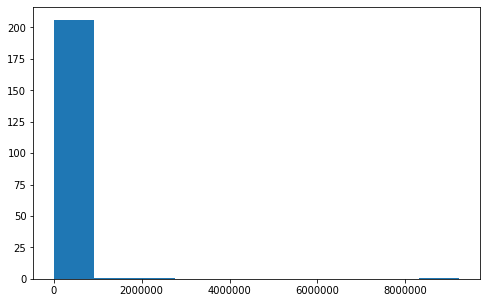

In [19]:
# Visualize the distribution of total cases, new cases, total deaths, new deaths

plt.figure(figsize = (8,5))

plt.hist(data = covid_now, x = 'total_cases');

This already requires more investigation. Why do we have entries with 8 Mil cases?

In [20]:
covid_now[covid_now.total_cases > 7000000]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
25859,OWID_WRL,NaN,World,2020-06-24,9229049.0,165635.0,477269.0,5588.0,1184.001,21.249,...,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58


So, the dataset contains an entry for the totals in the world. I will exclude it from the 'covid_now' dataset. If needed, I can sum up the values across columns, or I can read the values from 'covid_df'.

In [21]:
covid_now = covid_now[covid_now.iso_code != 'OWID_WRL']

### Visualize the distribution of total cases, new cases, total deaths, new deaths

Text(0.5, 1.0, 'Distibution of the number of new deaths in the world due to Covid today')

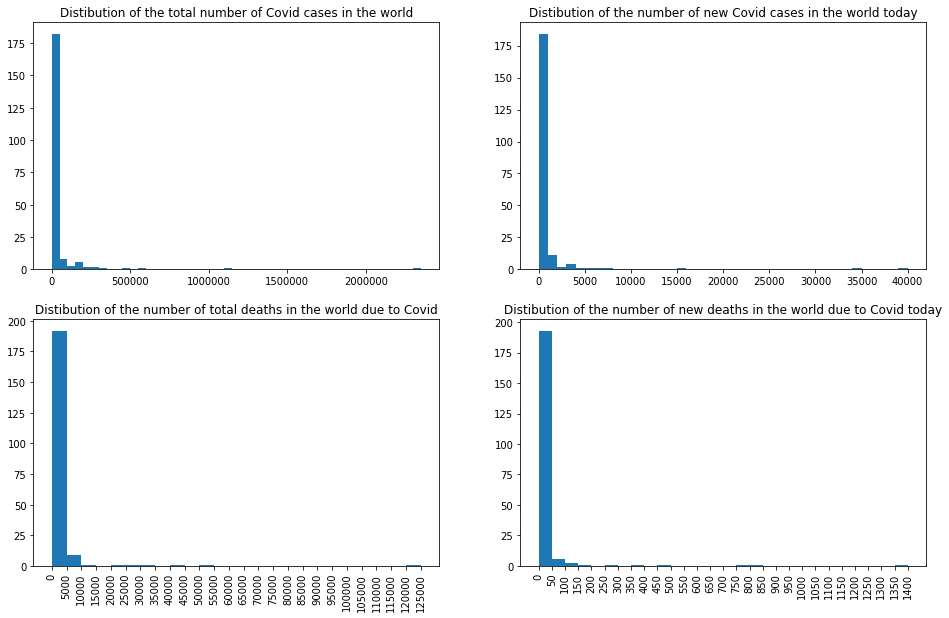

In [22]:
plt.figure(figsize = (16,10))

plt.subplot(2,2,1)
bin_size = 50000
bin_edges = np.arange(0, covid_now.total_cases.max() + bin_size, bin_size)
plt.hist(data = covid_now, x = 'total_cases', bins = bin_edges);
plt.title('Distibution of the total number of Covid cases in the world')

plt.subplot(2,2,2)
bin_size = 1000
bin_edges = np.arange(0, covid_now.new_cases.max() + bin_size, bin_size)
plt.hist(data = covid_now, x = 'new_cases', bins = bin_edges);
plt.title('Distibution of the number of new Covid cases in the world today')


plt.subplot(2,2,3)
bin_size = 5000
bin_edges = np.arange(0, covid_now.total_deaths.max() + bin_size, bin_size)
plt.hist(data = covid_now, x = 'total_deaths', bins = bin_edges);
plt.xticks(bin_edges, rotation = 90);
plt.title('Distibution of the number of total deaths in the world due to Covid')

plt.subplot(2,2,4)
bin_size = 50
bin_edges = np.arange(0, covid_now.new_deaths.max() + bin_size, bin_size)
plt.hist(data = covid_now, x = 'new_deaths', bins = bin_edges);
plt.xticks(bin_edges, rotation = 90);
plt.title('Distibution of the number of new deaths in the world due to Covid today')

Since the data is highly right skewed, I am going to represent the same on log scale

### Visualize the distribution of total cases, new cases, total deaths, new deaths on log scale

Text(0.5, 0, 'Number of New Deaths due to Covid Today')

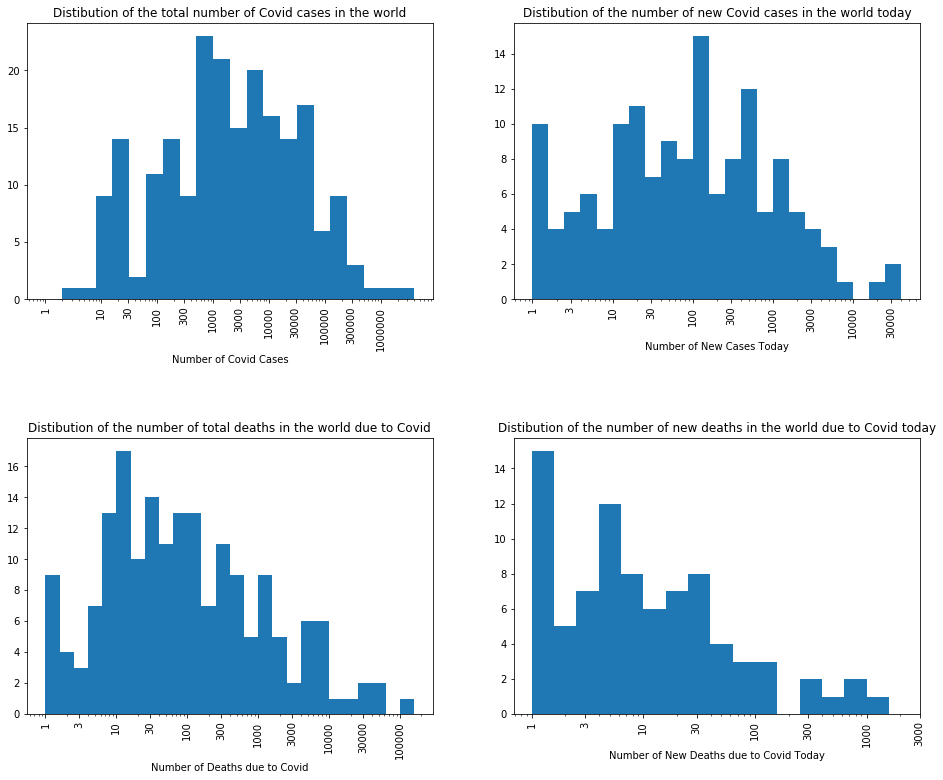

In [23]:
plt.figure(figsize = (16,12))
plt.subplots_adjust(top = 0.90, bottom=0.10, hspace=0.5, wspace=0.2)

plt.subplot(2,2,1)
bin_size = 0.3
bin_edges = 10 ** np.arange(0, np.log10(covid_now.total_cases.max()) + bin_size, bin_size)
plt.hist(data = covid_now, x = 'total_cases', bins = bin_edges);
plt.xscale('log')
ticks_locs = [1, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000]
plt.xticks(ticks_locs, ticks_locs, rotation = 90);
plt.title('Distibution of the total number of Covid cases in the world')
plt.xlabel('Number of Covid Cases')

bin_size = 0.2

plt.subplot(2,2,2)
bin_edges = 10 ** np.arange(0, np.log10(covid_now.new_cases.max()) + bin_size, bin_size)
plt.hist(data = covid_now, x = 'new_cases', bins = bin_edges);
plt.xscale('log')
ticks_locs = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xticks(ticks_locs, ticks_locs, rotation = 90);
plt.title('Distibution of the number of new Covid cases in the world today')
plt.xlabel('Number of New Cases Today')

plt.subplot(2,2,3)
bin_edges = 10** np.arange(0, np.log10(covid_now.total_deaths.max()) + bin_size, bin_size)
plt.hist(data = covid_now, x = 'total_deaths', bins = bin_edges);
plt.xscale('log')
ticks_locs = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(ticks_locs, ticks_locs, rotation = 90);
plt.title('Distibution of the number of total deaths in the world due to Covid')
plt.xlabel('Number of Deaths due to Covid')

plt.subplot(2,2,4)
bin_edges = 10 ** np.arange(0, np.log10(covid_now.new_deaths.max()) + bin_size, bin_size)
plt.hist(data = covid_now, x = 'new_deaths', bins = bin_edges);
plt.xscale('log')
ticks_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(ticks_locs, ticks_locs, rotation = 90);
plt.title('Distibution of the number of new deaths in the world due to Covid today')
plt.xlabel('Number of New Deaths due to Covid Today')

In [24]:
# For the next visualization, I would like to see where Switzerland is situated in coparison with other countries
# Below I extract the reference data for switzerland

swiss_values = reference_df[reference_df.location == 'Switzerland']
swiss_values

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
184,Switzerland,8654618.0,214.243,43.1,18.436,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78


### Visualize the distribution of population density, hospital beds per thousand, gdp per capita, diabetes prevalence, and Switzerland's position in these plots

Text(0.5, 0, 'Diabetes Prevalence')

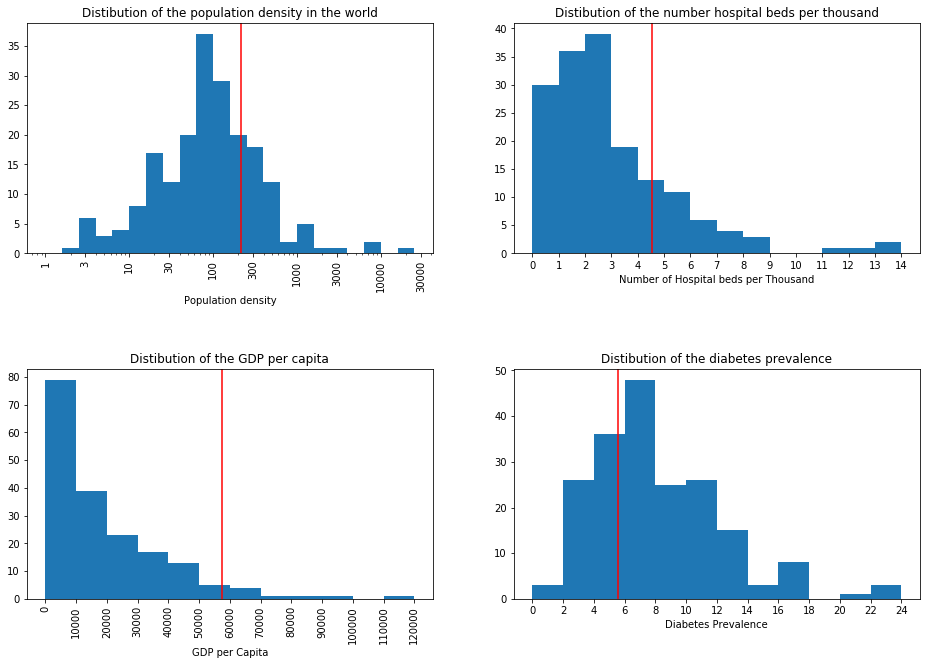

In [25]:
plt.figure(figsize = (16,10))
plt.subplots_adjust(top = 0.90, bottom=0.10, hspace=0.5, wspace=0.2)

plt.subplot(2,2,1) # The only subplot on log scale in this plot
bin_size = 0.2
bin_edges = 10 ** np.arange(0, np.log10(reference_df.population_density.max()) + bin_size, bin_size)
plt.hist(data = reference_df, x = 'population_density', bins = bin_edges);
plt.xscale('log')
ticks_locs = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xticks(ticks_locs, ticks_locs, rotation = 90);
plt.title('Distibution of the population density in the world')
plt.axvline(x = swiss_values['population_density'].values[0], color = 'red')
plt.xlabel('Population density')

plt.subplot(2,2,2)
bin_edges = np.arange(0, reference_df.hospital_beds_per_thousand.max() + 1, 1)
plt.hist(data = reference_df, x = 'hospital_beds_per_thousand', bins = bin_edges);
plt.xticks(bin_edges);
plt.title('Distibution of the number hospital beds per thousand')
plt.axvline(x = swiss_values['hospital_beds_per_thousand'].values[0], color = 'red')
plt.xlabel('Number of Hospital beds per Thousand')

plt.subplot(2,2,3)
bin_size = 10000
bin_edges = np.arange(0, reference_df.gdp_per_capita.max() + bin_size, bin_size)
plt.hist(data = reference_df, x = 'gdp_per_capita', bins = bin_edges);
plt.xticks(bin_edges, rotation = 90);
plt.title('Distibution of the GDP per capita')
plt.axvline(x = swiss_values['gdp_per_capita'].values[0], color = 'red')
plt.xlabel('GDP per Capita')

plt.subplot(2,2,4)
bin_edges = np.arange(0, reference_df.diabetes_prevalence.max() + 2, 2)
plt.hist(data = reference_df, x = 'diabetes_prevalence', bins = bin_edges);
plt.xticks(bin_edges);
plt.title('Distibution of the diabetes prevalence')
plt.axvline(x = swiss_values['diabetes_prevalence'].values[0], color = 'red')
plt.xlabel('Diabetes Prevalence')

### What is the distribution of the maximum stringency index per country?

In [26]:
# Get the maximum applied stringency index per country
max_stringency_idx = covid_df.groupby('location', as_index = False)['stringency_index'].max()
max_stringency_idx.sort_values(by = 'stringency_index', ascending = False, inplace = True)
max_stringency_idx.head()

,location,stringency_index
106,Kuwait,100.0
179,Sri Lanka,100.0
90,India,100.0
102,Jordan,100.0
86,Honduras,100.0


Text(0, 0.5, 'Number of countries')

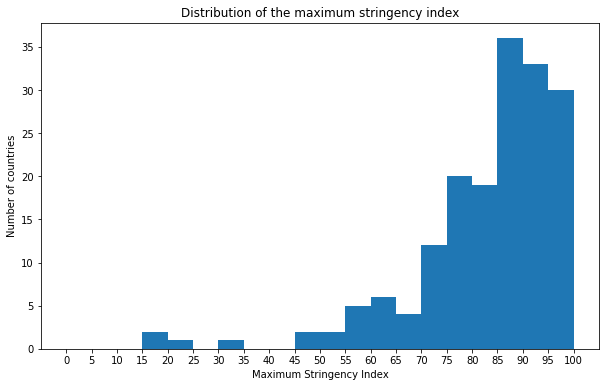

In [27]:
plt.figure(figsize = (10,6))
bin_edges = np.arange(0, 100 + 5, 5)
plt.hist(data = max_stringency_idx, x = 'stringency_index', bins = bin_edges)
plt.xticks(bin_edges);
plt.title('Distribution of the maximum stringency index')
plt.xlabel('Maximum Stringency Index')
plt.ylabel('Number of countries')

<a id = "univ_explor_conc"></a>
### Univariate Exploration Conclusions

I used a log transformation to look at the following values: total cases, new cases, total deaths, new deaths and population density. The reason is because the data was highly right skewed.

Total Covid cases data looks aproximately normally distributed on log scale. On log scale, the distribution of new Covid cases in the current day looks bimodal, and the distributions of total Covid deaths and new Covid deaths are right skewed. Population density is normally distributed on log scale.

On normal scale, the distributions of hospital beds per thousand people and the distribution of GDP per capita are right skewed. The distribution of diabetes prevalence is slightly right skewed.

The vertical lines represent Switzerland as I wanted to see where Switzerland is situated in comparison with other countries.

Most of the countries implemented strict measures against Covid; this can be seen from the left skewed distribution above.


The surprising points in the analyzed dataset would be the countries on the far right of the plots representing the total cases, new cases, total deaths, new deaths. However, these represent US, Brazil and Russia that have a very high number of Covid cases.

These plots were computed based on 'covid_now' and 'reference_df' DataFrames. The transformation to create these DataFrames was explained above.

<a id = "bivar_explor"></a>
## Bivariate Exploration

To start off with, I want to finalize the analysis started above on the stringecy index and see which countries implemented the strictest and the most lenient measures. 

Then, I want to look at the pairwise correlations present between selected features in the data.

### Which countries implemented the strictest and the most lenient measures based on the stringency index

In [28]:
# Number of countries for which stringency index exists
print(sum(max_stringency_idx.stringency_index.value_counts().values)) 

#Total number of countries in 'max_stringency_idx'
print(max_stringency_idx.shape[0])

# There are (212 - 173) 39 countries with 'N/A' in all values of the 'stringency index' in 'covid_df'

173
212


Text(0, 0.5, 'Stringency Index')

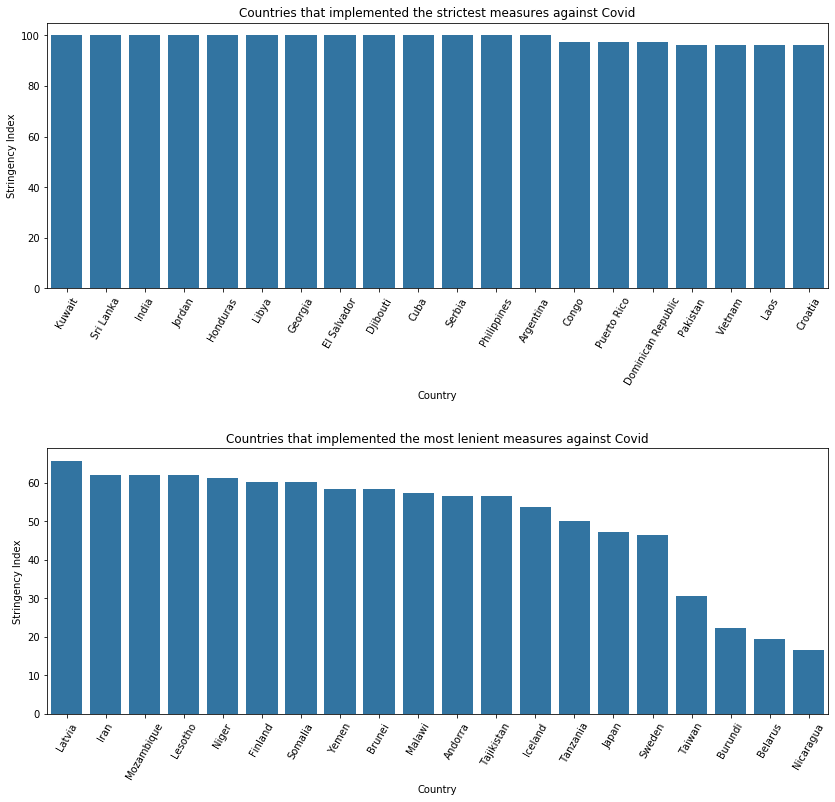

In [29]:
# Countries that implemented the strictest and the most lenient measures

plt.figure(figsize = (14,12))
plt.subplots_adjust(top = 0.90, bottom=0.10, hspace=0.6, wspace=0.4)

base_color = sb.color_palette()[0]

plt.subplot(2,1,1)
sb.barplot(data = max_stringency_idx.iloc[:20], x = 'location', y = 'stringency_index', color = base_color)
plt.xticks(rotation = 60)
plt.title('Countries that implemented the strictest measures against Covid')
plt.xlabel('Country')
plt.ylabel('Stringency Index')

plt.subplot(2,1,2)
sb.barplot(data = max_stringency_idx.dropna().iloc[-20:], x = 'location', y = 'stringency_index', color = base_color)
plt.xticks(rotation = 60)
plt.title('Countries that implemented the most lenient measures against Covid')
plt.xlabel('Country')
plt.ylabel('Stringency Index')

### Correlations between numeric values

In [30]:
numeric_vars = ['total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', \
                'new_deaths_per_million', 'population_density', 'gdp_per_capita', 'diabetes_prevalence', \
                'hospital_beds_per_thousand']

In [31]:
covid_now[numeric_vars].corr()

,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population_density,gdp_per_capita,diabetes_prevalence,hospital_beds_per_thousand
total_cases_per_million,1.000000,0.662291,0.502762,0.236850,0.098925,0.609109,0.130983,0.033562
new_cases_per_million,0.662291,1.000000,0.132140,0.546415,-0.005306,0.289102,0.171580,-0.060275
total_deaths_per_million,0.502762,0.132140,1.000000,0.286981,0.034049,0.385953,-0.115155,0.110180
new_deaths_per_million,0.236850,0.546415,0.286981,1.000000,-0.053951,-0.004332,0.002899,-0.052681
population_density,0.098925,-0.005306,0.034049,-0.053951,1.000000,0.297808,0.017166,0.314974
gdp_per_capita,0.609109,0.289102,0.385953,-0.004332,0.297808,1.000000,0.265246,0.297437
diabetes_prevalence,0.130983,0.171580,-0.115155,0.002899,0.017166,0.265246,1.000000,-0.067372
hospital_beds_per_thousand,0.033562,-0.060275,0.110180,-0.052681,0.314974,0.297437,-0.067372,1.000000


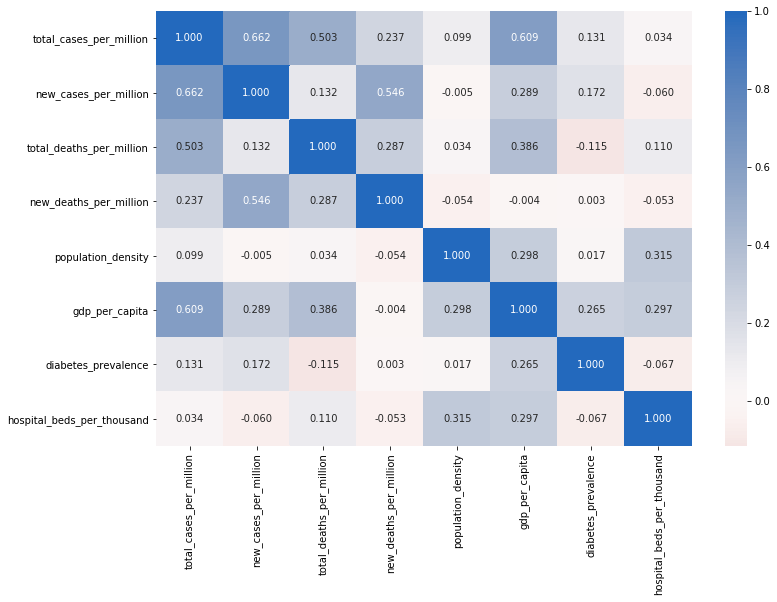

In [32]:
# correlation plot
plt.figure(figsize = (12, 8))

sb.heatmap(covid_now[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
b, t = plt.ylim()
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

The correlation matrix above shows that the number of hospital beds per thousand is positively correlated with the GDP per capita and the population density, which is not surprising.

What is interesting is that the GDP per capita has a strong correlation to the total cases per million, which shows that well developed countries were heavily impacted (at least in the first phase) by this new disease.

The population density looks to not be correlated with total cases per million; the GDP per capita, diabetes prevalence and hospital beds per thousand look to not have a correlation reationship with the total deaths per million. The same can be see in the PairGrid below, but I will have a closer look at these relationships below, applying also log transformations.

/Users/pisoias/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/pisoias/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


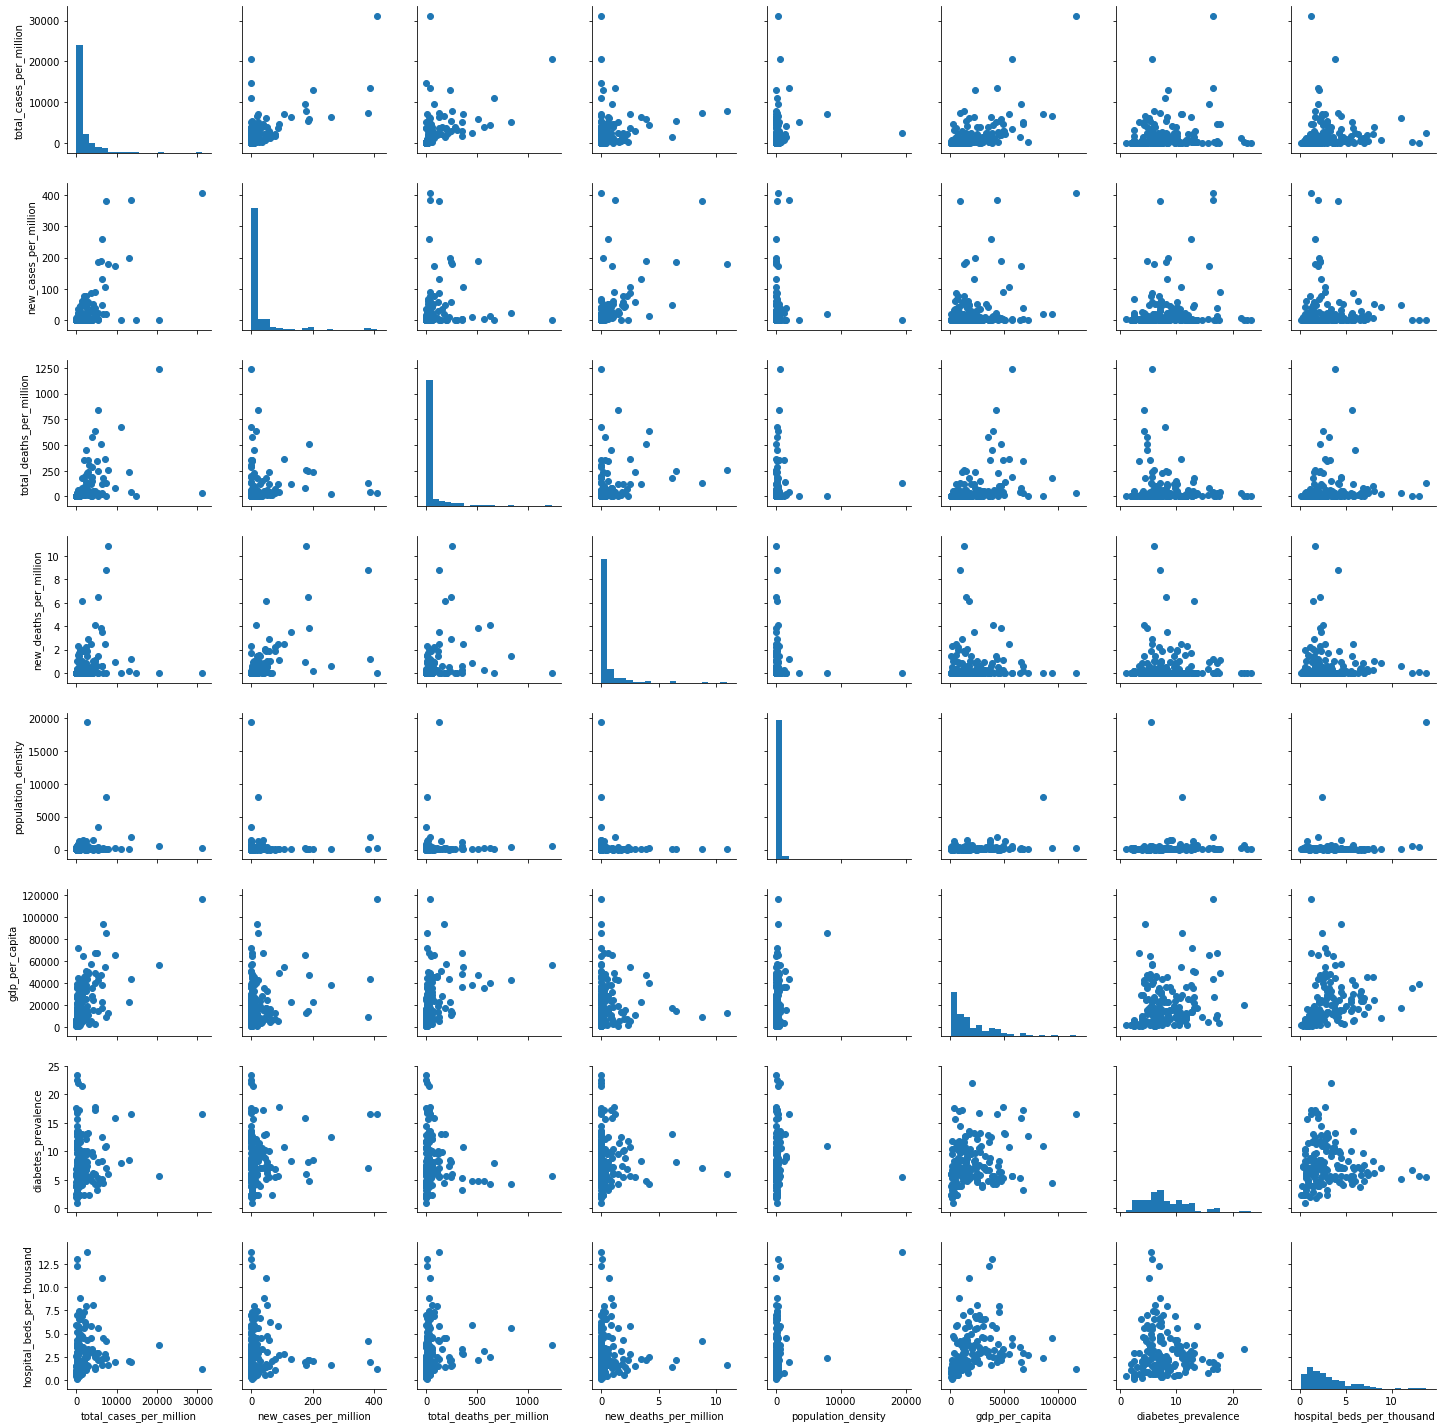

In [33]:
g = sb.PairGrid(data = covid_now, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

### Is there are correlation between the population density and the total number of Covid cases per million inhabitants?

Text(0, 0.5, 'Total Cases per Million')

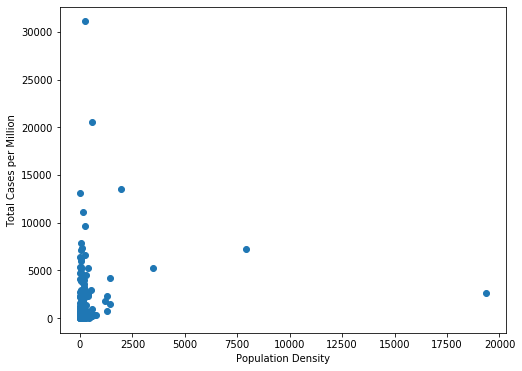

In [34]:
plt.figure(figsize = (8,6))

plt.scatter(data = covid_now, x = 'population_density', y = 'total_cases_per_million')
plt.xlabel('Population Density')
plt.ylabel('Total Cases per Million')

In [35]:
# Check the outlier on the population density axis

covid_now[covid_now.population_density > 17500] 

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15724,MCO,Europe,Monaco,2020-06-24,101.0,0.0,5.0,0.0,2573.642,0.0,...,NaN,NaN,NaN,NaN,5.46,NaN,NaN,NaN,13.8,86.75


Monaco is indeed the country with the highest population density in the world (so it is not an error in the data).
Source: https://www.weforum.org/agenda/2018/03/these-are-the-world-s-most-densely-populated-places/

I will apply log transformations both on x and on y axes.

Text(0, 0.5, 'Total Cases per Million')

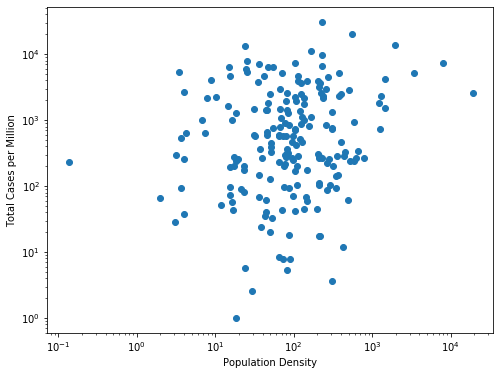

In [36]:
# Is there are correlation between the population density and the total number of Covid cases per million inhabitants?

plt.figure(figsize = (8,6))

plt.scatter(data = covid_now, x = 'population_density', y = 'total_cases_per_million')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Population Density')
plt.ylabel('Total Cases per Million')

It doesn't look to me that the population density has any correlation on the spread of Covid.

### Is there any correlation between the total deaths per million inhabitants and hospital beds per thousand people?

In [37]:
covid_now['log_total_deaths_per_million'] = np.log10(covid_now.total_deaths_per_million)
covid_now['log_total_cases_per_million'] = np.log10(covid_now.total_cases_per_million)

/Users/pisoias/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Total Deaths per Million')

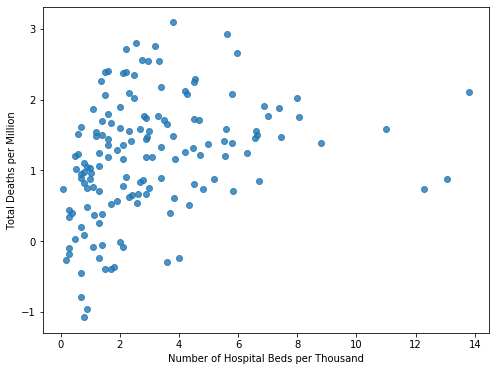

In [38]:
plt.figure(figsize = (8,6))

sb.regplot(data = covid_now, x = 'hospital_beds_per_thousand', y = 'log_total_deaths_per_million')

plt.xlabel('Number of Hospital Beds per Thousand')
plt.ylabel('Total Deaths per Million')


It also doesn't look to me that more hospital beds per thousand are correlated to a decrease in total deaths.  

### Is there any correlation between the total deaths per million inhabitants and diabetes prevalence?

Text(0, 0.5, 'Total Deaths per Million')

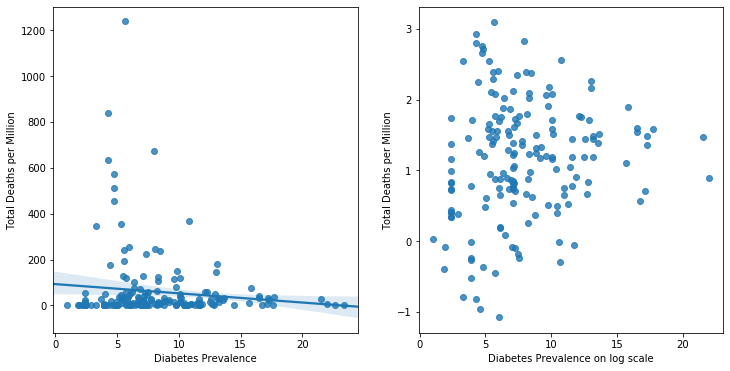

In [39]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sb.regplot(data = covid_now, x = 'diabetes_prevalence', y = 'total_deaths_per_million', fit_reg = True)
plt.xlabel('Diabetes Prevalence')
plt.ylabel('Total Deaths per Million')

plt.subplot(1,2,2)
sb.regplot(data = covid_now, x = 'diabetes_prevalence', y = 'log_total_deaths_per_million', fit_reg = True)
plt.xlabel('Diabetes Prevalence on log scale')
plt.ylabel('Total Deaths per Million')

Similarly here, a lower diabetes prevalence of the country didn't help in having a lower mortality rate due to Covid. There is also no strong correlation between the variable; we could maybe say that there is a slight negative correlation due to the fact that the countries most affected by Covid don't have a high diabetes prevalance.

### Is there any correlation between the total cases per million inhabitants and the GDP per capita?

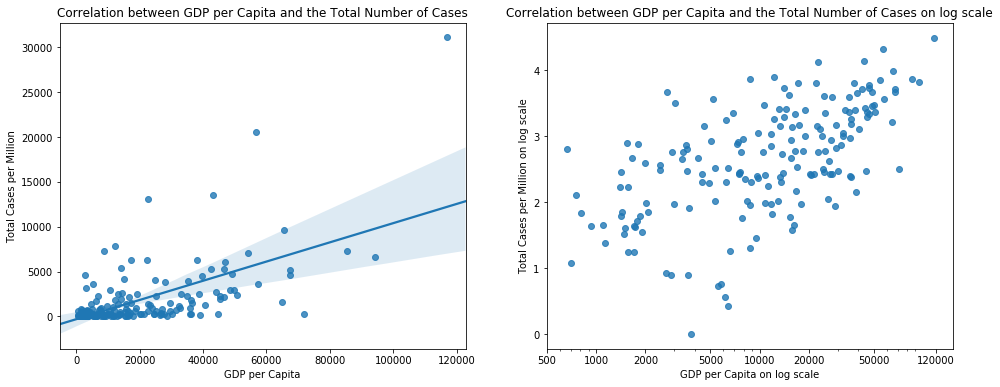

In [40]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sb.regplot(data = covid_now, x = 'gdp_per_capita', y = 'total_cases_per_million')
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases per Million')
plt.title('Correlation between GDP per Capita and the Total Number of Cases')

plt.subplot(1,2,2)
sb.regplot(data = covid_now, x = 'gdp_per_capita', y = 'log_total_cases_per_million', fit_reg = False)
plt.xscale('log')
plt.xlabel('GDP per Capita on log scale')
plt.ylabel('Total Cases per Million on log scale')
plt.title('Correlation between GDP per Capita and the Total Number of Cases on log scale') 
xticks_locs = [500, 1000, 2000, 5000, 10000, 20000, 50000, 120000]
plt.xticks(xticks_locs, xticks_locs);

There is a positive correlation between the GDP per capita and the total Covid cases until this date (June 23rd 2020). This is probably because a more developed economy also implies more travel across borders, more meetings, conferences, leading to a higher spread, at least in the first phase.

### What are the Covid 'most affected' countries in the world nowadays, based on the average of new cases per million in the last 14 days?

In [41]:
# Date two weeks ago
two_weeks_ago = pd.Timestamp((datetime.now() - timedelta(days=14)).date())

# Extract from 'covid_df' the data of the last two weeks
covid_df_last_two_weeks = covid_df[covid_df.date >= two_weeks_ago]

# Group by country and calculate the average
covid_df_last_two_weeks = covid_df_last_two_weeks.groupby('location', as_index = False)['new_cases_per_million'].mean()

# Sort the DataFrame descending based on the average of new cases per million
covid_df_last_two_weeks.sort_values(by = 'new_cases_per_million', ascending = False, inplace = True)

Text(0, 0.5, 'New Cases per Million')

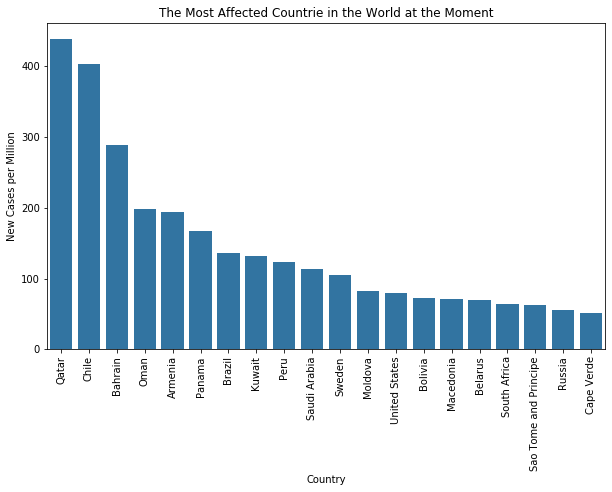

In [42]:
# Plot the most affected countries nowadays based on the average of new cases per million in the last 14 days
base_color = sb.color_palette()[0]

plt.figure(figsize = (10, 6))
sb.barplot(data = covid_df_last_two_weeks.iloc[:20], x = 'location', y = 'new_cases_per_million', color = base_color)
plt.xticks(rotation = 90)
plt.title('The Most Affected Countrie in the World at the Moment')
plt.xlabel('Country')
plt.ylabel('New Cases per Million')

### How are countries in each continent affected by Covid? - Total Cases per Million vs Continent

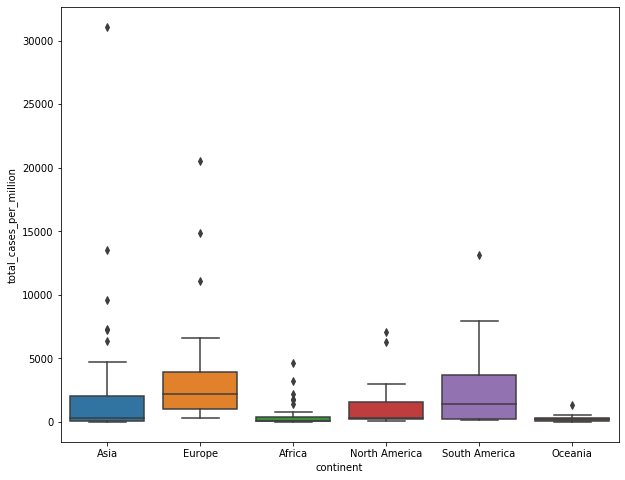

In [43]:
plt.figure(figsize = (10, 8))
sb.boxplot(data = covid_now, x = 'continent', y = 'total_cases_per_million')

In [44]:
# Let's see which countries are the two most extreme outliers before I 'zoom in' the view on y axis

covid_now[(covid_now.continent == 'Asia') & (covid_now.total_cases_per_million > 30000)]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,log_total_deaths_per_million,log_total_cases_per_million
19237,QAT,Asia,Qatar,2020-06-24,89579.0,1176.0,99.0,0.0,31092.376,408.183,...,NaN,176.69,16.52,0.8,26.9,NaN,1.2,80.23,1.536078,4.492654


In [45]:
covid_now[(covid_now.continent == 'Europe') & (covid_now.total_cases_per_million > 20000)]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,log_total_deaths_per_million,log_total_cases_per_million
20153,SMR,Europe,San Marino,2020-06-24,698.0,0.0,42.0,0.0,20566.916,0.0,...,NaN,NaN,5.64,NaN,NaN,NaN,3.8,84.97,3.092563,4.313169


(-1000, 15000)

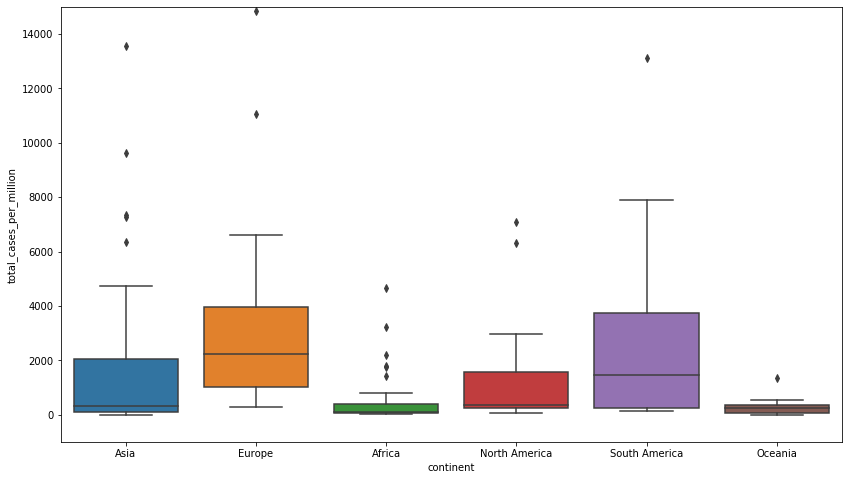

In [46]:
plt.figure(figsize = (14, 8))
sb.boxplot(data = covid_now, x = 'continent', y = 'total_cases_per_million')
plt.ylim(-1000, 15000)

### How did the number of total Covid cases and total Covid deaths change over time? Is the trend now still rising or has the spread slowed down?

[-2000000.        0.  2000000.  4000000.  6000000.  8000000. 10000000.]


/Users/pisoias/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


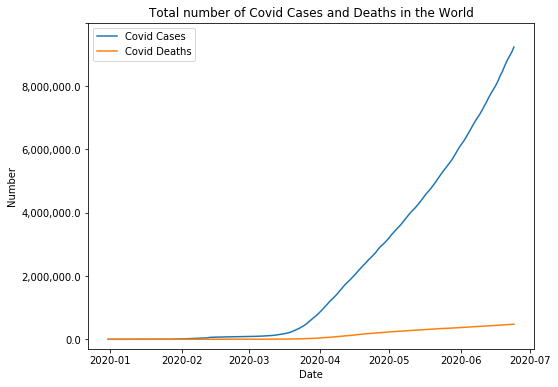

In [47]:
plt.figure(figsize = (8,6))
ax1 = sb.lineplot(data = covid_df[covid_df.location == 'World'], x = 'date', y = 'total_cases')
sb.lineplot(data = covid_df[covid_df.location == 'World'], x = 'date', y = 'total_deaths')

plt.title('Total number of Covid Cases and Deaths in the World')
plt.xlabel('Date')
plt.ylabel('Number')

ylocs, labels = plt.yticks()
print(ylocs)
plt.yticks(ylocs, [f"{num:,}" for num in ylocs[:-1]])
plt.ylim(-300000, ylocs[-1])

ax1.legend(['Covid Cases', 'Covid Deaths'])

Unfortunately, it doesn't look like the trend has slowed down; on the contrary, the number of Covid cases and Covid deaths in the world continue to increase.

###  How did the number of Covid cases changed over time in Switzerland?

[-5000.     0.  5000. 10000. 15000. 20000. 25000. 30000. 35000.]


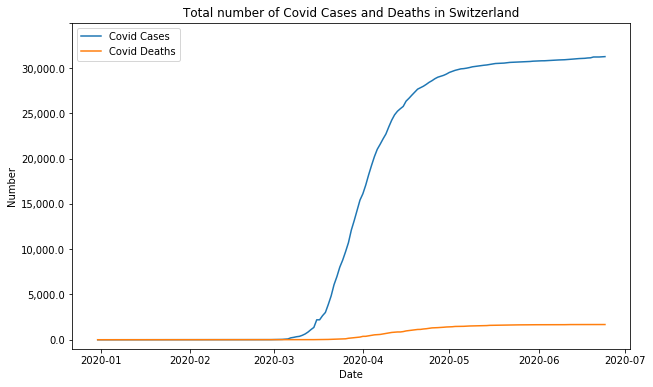

In [48]:
plt.figure(figsize = (10,6))

ax1 = sb.lineplot(data = covid_df[covid_df.location == 'Switzerland'], x="date", y="total_cases")
sb.lineplot(data = covid_df[covid_df.location == 'Switzerland'], x="date", y="total_deaths")

ylocs, labels = plt.yticks()
print(ylocs)
plt.yticks(ylocs, [f"{num:,}" for num in ylocs[:-1]])
plt.ylim(-1000, ylocs[-1])

plt.title('Total number of Covid Cases and Deaths in Switzerland')
plt.xlabel('Date')
plt.ylabel('Number')
ax1.legend(['Covid Cases', 'Covid Deaths'])

We can see that between March and May, the number of Covid cases increased very rapidly in Switzerland, but the measures enforced lead to results, such that after May the increase in new Covid cases has slowed down.

### Switzerland - Number of new cases per million calculated based on a 14 days rolling average

The current restriction in Romania (my home country) is the following: people can enter Romania only if they come from a country that had less then 5 new Covid cases per million on 14 days rolling average basis

I live in Switzerland and I want to find out if I can fly to Romania.

In [49]:
# Create a new column that will store the moving/rolling average of new cases

covid_swiss_df.loc[:,'new_cases_MA'] = covid_swiss_df['new_cases_per_million'].rolling(window=14, center=False).mean()
covid_swiss_df.tail()

/Users/pisoias/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/pisoias/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,new_cases_MA
22743,CHE,Europe,Switzerland,2020-06-20,31209.0,92.0,1677.0,0.0,3606.052,10.630,...,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78,2.938214
22744,CHE,Europe,Switzerland,2020-06-21,31209.0,0.0,1677.0,0.0,3606.052,0.000,...,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78,2.773143
22745,CHE,Europe,Switzerland,2020-06-22,31209.0,0.0,1679.0,2.0,3606.052,0.000,...,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78,2.698857
22746,CHE,Europe,Switzerland,2020-06-23,31227.0,18.0,1679.0,0.0,3608.132,2.080,...,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78,2.789643
22747,CHE,Europe,Switzerland,2020-06-24,31249.0,22.0,1679.0,0.0,3610.674,2.542,...,57410.166,NaN,99.739,5.59,22.6,28.9,NaN,4.53,83.78,2.839143


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

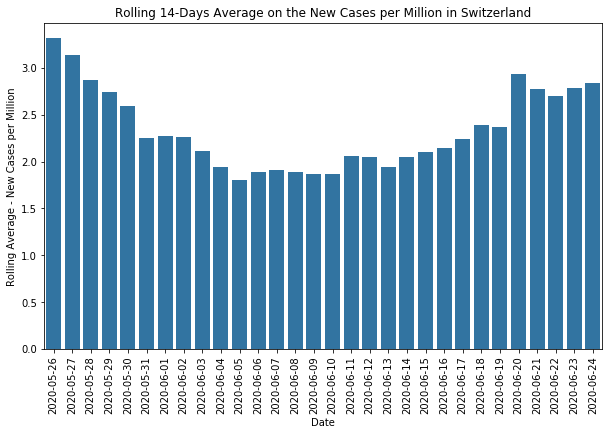

In [50]:
plt.figure(figsize = (10, 6))

base_color = sb.color_palette()[0]

sb.barplot(data = covid_swiss_df[-30:], x = 'date', y = 'new_cases_MA', color = base_color)

plt.title('Rolling 14-Days Average on the New Cases per Million in Switzerland')
plt.xlabel('Date')
plt.ylabel('Rolling Average - New Cases per Million')
plt.xticks(rotation = 90)

<a id="multivar_explor"></a>
### Multivariate Exploration

### How fast did Covid spread in each continent?

In [51]:
covid_wrl_time = covid_df.groupby(['date', 'continent'], as_index = False)['total_cases'].sum()
covid_wrl_time.tail(12)

,date,continent,total_cases
1050,2020-06-23,Africa,315261.0
1051,2020-06-23,Asia,1943871.0
1052,2020-06-23,Europe,2281809.0
1053,2020-06-23,North America,2705313.0
1054,2020-06-23,Oceania,9002.0
1055,2020-06-23,South America,1807462.0
1056,2020-06-24,Africa,324392.0
1057,2020-06-24,Asia,1986313.0
1058,2020-06-24,Europe,2051050.0
1059,2020-06-24,North America,2749788.0


After working on this case for several days, I observed the following: for Europe always in the current day, there are less total cases than in the previous day. (This cannot happen.) For example, on June 22nd, there were less cases than on June 21st. However, after a day passes, the total cases number for Europe is updated. For example, on June 23rd, Europe has less cases than on June 22nd, but now June 22nd has more cases than June 21st. I think that, for Europe, the dataset is being updated for the previous day as well. Probably some countries provide the data with delay.

To avoid displaying this problem in the following plot, just for Europe, I will remove from the dataset the last entry for the current day.

In [52]:
covid_wrl_time[covid_wrl_time.continent == 'Europe'].tail(5)

,date,continent,total_cases
1034,2020-06-20,Europe,2237200.0
1040,2020-06-21,Europe,2252044.0
1046,2020-06-22,Europe,2265248.0
1052,2020-06-23,Europe,2281809.0
1058,2020-06-24,Europe,2051050.0


In [53]:
# Get the index of the most current entry for Europe (to drop)
index_to_drop = covid_wrl_time[(covid_wrl_time.date == yesterday) & (covid_wrl_time.continent == 'Europe')].index

# Drop the incorrent entry
covid_wrl_time.drop(index = index_to_drop, inplace=True)

Text(0, 0.5, 'Total Cases')

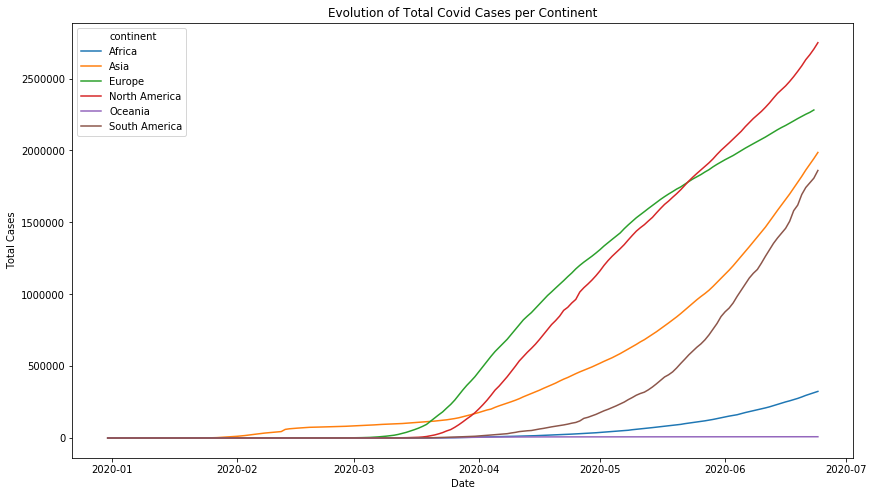

In [54]:
plt.figure(figsize = (14,8))
sb.lineplot(x="date", y="total_cases", hue = 'continent', err_style = None, data=covid_wrl_time)
plt.title('Evolution of Total Covid Cases per Continent')
plt.xlabel('Date')
plt.ylabel('Total Cases')

We can see that even if China was the first country to be affected by Covid, Asia had a slow increase until April 2020. This is due to the rapid and strict measures that asian countries implemented initially. Once these measures were relaxed, the spread increased. This is probably also due to the situation in India.

Europe had a fast increase since March, when the number of cases in Italy and Spain increased drastically, but the curve seems to have slightly slowed down. North America has currently the highest number of Covid cases, mostly due to the fact that U.S. has more than 2.4 million Covid cases. The Covid spread seems to have reached South America as well, where Brazil is highly affected. Let's just hope that the numbers in Africa will remain low and we won't see a similar pattern there.

### Total cases vs GDP per Capita vs Continent

/Users/pisoias/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Correlation between Total Covid Cases and the GDP per Capita')

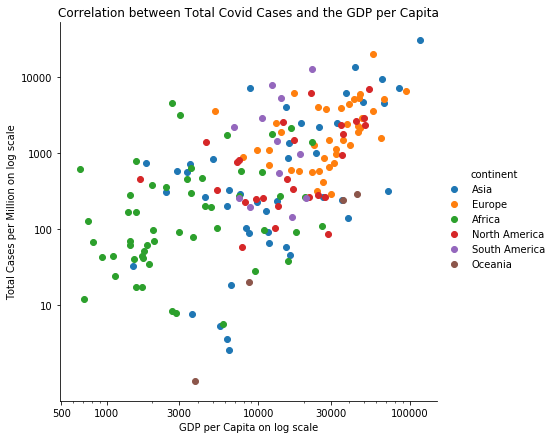

In [55]:
g = sb.FacetGrid(data = covid_now, hue = 'continent', size = 6)
g.map(plt.scatter, 'gdp_per_capita', 'log_total_cases_per_million')
g.add_legend()

plt.xscale('log')
xticks_locs = [500, 1000, 3000, 10000, 30000, 100000]
yticks_labels = [10, 100, 1000, 10000]
plt.xticks(xticks_locs, xticks_locs)
plt.yticks([1,2,3,4], yticks_labels)

plt.xlabel('GDP per Capita on log scale')
plt.ylabel('Total Cases per Million on log scale')
plt.title('Correlation between Total Covid Cases and the GDP per Capita')

### Switzerland - Number of tests done per day vs number of new cases found

In [56]:
covid_swiss_df[['date', 'new_cases', 'total_tests', 'new_tests']]

,date,new_cases,total_tests,new_tests
22571,2019-12-31,0.0,NaN,NaN
22572,2020-01-01,0.0,NaN,NaN
22573,2020-01-02,0.0,NaN,NaN
22574,2020-01-03,0.0,NaN,NaN
22575,2020-01-04,0.0,NaN,NaN
...,...,...,...,...
22743,2020-06-20,92.0,508843.0,4587.0
22744,2020-06-21,0.0,510593.0,1750.0
22745,2020-06-22,0.0,515124.0,4531.0
22746,2020-06-23,18.0,NaN,NaN


In [57]:
# As mentioned before, I will suppliment the test data with information from the swiss government found at:

swiss_tests_paths = 'https://public.tableau.com/vizql/w/COVID-19_Dash3/v/Dashboard3d/vudcsv/sessions/21EC9ED6E4AC42CBA125814F31B92490-0:0/views/8737144303770062580_5614005548596609391?underlying_table_id=Migrated%20Data&underlying_table_caption=Full%20Data'

file_name = 'swiss-test-data.csv'

#If the file exists in the current directory, delete it
#if os.path.exists(file_name): 
    #os.remove(file_name)
    
# Dowload the latest dataset
#response = requests.get(swiss_tests_paths)

#with open(file_name, mode = 'wb') as file:
    #file.write(response.content)

Unfortunately, I cannot download this file with every run of the notebook because the link changes. I take the data from a Tableau visualization found at: https://covid-19-schweiz.bagapps.ch/de-3.html. 

For this project, I included the latest file with the zip archive.

In [58]:
swiss_tests_df = pd.read_csv('swiss-test-data.csv', encoding='utf-16', sep ='\t')
swiss_tests_df.tail(6)

,Datum,Ergebnisse_der_Test,Outcome_tests,Anzahl_tests,Number_of_tests
294,21/06/2020,positiv,Positive,14,14
295,21/06/2020,negativ,Negative,1748,1748
296,22/06/2020,positiv,Positive,28,28
297,22/06/2020,negativ,Negative,6370,6370
298,23/06/2020,positiv,Positive,48,48
299,23/06/2020,negativ,Negative,6759,6759


In [59]:
# There are two entries for each day in the dataset - I will visualize for the previous 60 days
swiss_tests_df = swiss_tests_df[-120:]

Text(0, 0.5, 'Number of Tests')

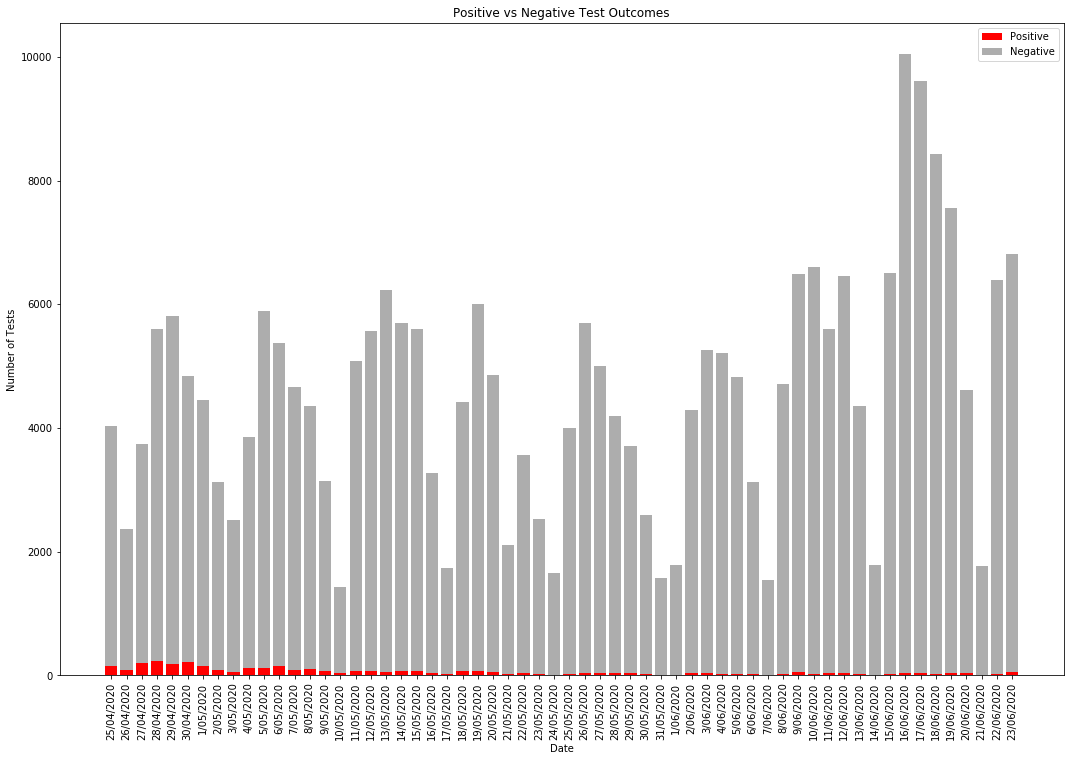

In [60]:
# Display the number of tests performed vs the number of positive cases in the last month

plt.figure(figsize = (18,12))

baselines = np.zeros(60)

# First category - Datum (60 values - the last 60 days)
# Second category - Outcome_tests (2 values - Positive or Negative)
cat2_order = ['Positive', 'Negative']

for i in range(len(cat2_order)):
    # isolate the counts of the first category
    cat2 = cat2_order[i]
    inner_counts = swiss_tests_df[swiss_tests_df['Outcome_tests'] == cat2][['Datum', 'Number_of_tests']]
    # then plot those counts on top of the accumulated baseline
    if i == 0:
        color = 'red'
    else:
        color = (0.2, 0.2, 0.2, 0.4)
    plt.bar(x = np.arange(60), height = inner_counts['Number_of_tests'].values, bottom = baselines, color = color)
    baselines += inner_counts['Number_of_tests'].values
    
plt.xticks(np.arange(60), swiss_tests_df['Datum'].drop_duplicates().values, rotation = 90)
plt.legend(cat2_order)

plt.title('Positive vs Negative Test Outcomes')
plt.xlabel('Date')
plt.ylabel('Number of Tests')

We can see how less tests are done on Sundays or on a public holiday (e.g. June 1st). We can also see how the number of positive tests decreases over time.

<a id="conclusions"></a>
## Conclusions

With the help of data visualizations, we can see patterns in data, trends and corelations. It is also easier to simply summarize data.

In this data analysis exercise, I presented several findings related to the current situation of Covid. I tried to answer some of the questions that me and my friends wanted (or needed) to know.